
# 📊 Titanic: Machine Learning from Disaster

## Author: RIDDY MAZUMDER
## Description  
**This notebook follows a complete end-to-end data science workflow, from loading data to model evaluation and final submission.**  
****Each section is clearly explained and well-structured for learning and presentation.****


## 1. Libraries Required

****In this section, we import all the necessary Python libraries used throughout the project.****  
**These include libraries for**:
- **Data manipulation**  
- **Visualization** 
- **Machine learning**

In [30]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


## 2. Load Dataset

In [31]:
train_data=pd.read_csv("/kaggle/input/titanic/train.csv")
test_data=pd.read_csv("/kaggle/input/titanic/test.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 3. Data Exploration & Cleaning

## 3.1 Overview

**Check shape, missing values, data types.**

In [32]:
train_data.info()
train_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 3.2 Visualization

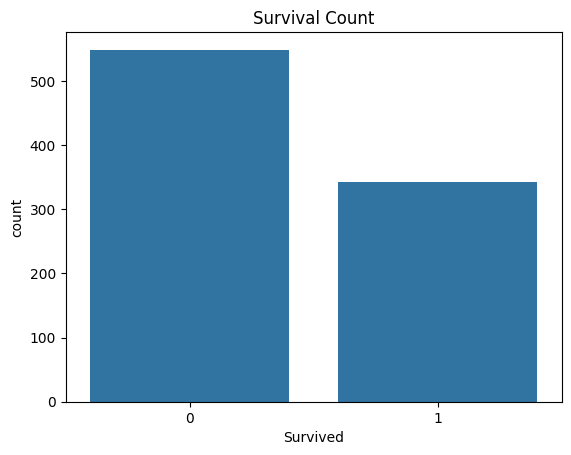

In [33]:
sns.countplot(x='Survived', data=train_data)
plt.title('Survival Count')
plt.show()

## 3.3 Survival Rate
**Survival Rate of Women**,**Survival Rate of men**

In [34]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women=sum(women)/len(women)
print('survived of woman',rate_women)

survived of woman 0.7420382165605095


In [35]:
Men= train_data.loc[train_data.Sex=='male']['Survived']
rate_men=sum(Men)/len(Men)
print("survived of men",rate_men)

survived of men 0.18890814558058924


## 4. Model Building
**Split Data,Train Model,Evaluate Model,Submission File**

In [36]:
from sklearn.ensemble import RandomForestClassifier

# Define target and features
y = train_data["Survived"]
features = ["Pclass", "Sex", "SibSp","Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

# Initialize and train model
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)

# Make predictions
predictions = model.predict(X_test)

# Output results
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)

print("Your submission was successful")

Your submission was successful


## 4.1 Model Accuracy_Score
**Predictions on training data**


Training Accuracy: 0.8159


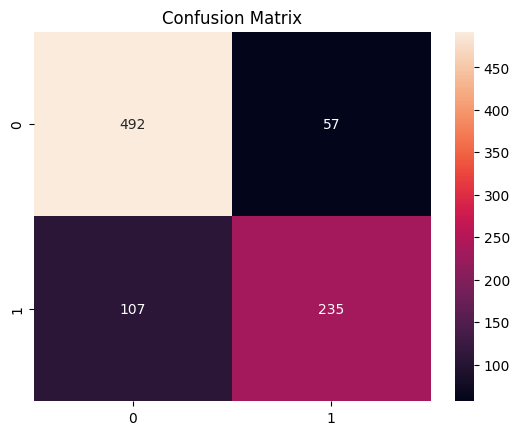

In [37]:
train_predictions = model.predict(X) 
train_accuracy = accuracy_score(y, train_predictions) 
print(f"Training Accuracy: {train_accuracy:.4f}")

sns.heatmap(confusion_matrix(y, train_predictions), annot=True, fmt='d') 
plt.title('Confusion Matrix') 
plt.show()